In [1]:
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import geometry
import shapely
from matplotlib_scalebar.scalebar import ScaleBar
import os
import matplotlib as mpl
import sys
sys.path.append('/wsfish/glioblastoma/')
import FISHspace as sp
# make font changeable in Illustrator
mpl.rcParams['pdf.fonttype'] = 42

# save figure with no pad
mpl.rcParams['savefig.pad_inches'] = 0
mpl.rcParams['savefig.bbox'] = 'tight'

# set axes width
mpl.rcParams['axes.linewidth'] = 0.2
mpl.rcParams['xtick.minor.pad'] = 0
mpl.rcParams['xtick.major.pad'] = 0
mpl.rcParams['ytick.minor.pad'] = 0
mpl.rcParams['ytick.major.pad'] = 0
mpl.rcParams['xtick.minor.width'] = 0.2
mpl.rcParams['xtick.major.width'] = 0.2
mpl.rcParams['ytick.minor.width'] = 0.2
mpl.rcParams['ytick.major.width'] = 0.2

# use colorblind seaborn style
plt.style.use('seaborn-colorblind')
adata = sc.read_h5ad('../DataSubmission/GBM_Linnarsson_EEL.h5ad')

2023-08-29 17:46:07.004356: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [10]:

cluster_colors_GBM = {
    'AC-like':'#2ecc71',
    'GBL-like':'#c2f970',
    'preOPC-like':'#7befb2',
    'nIPC-like':'#FFF192',
    'RG-like':'#ff9470',
    'nIPC-RG-like':'#ff9470',
    'OPC-like':'#89c4f4', 
    
    'GW-like':'#e76d89',

    'Endothelial':'#d5b8ff', 
    'Mural': '#8c14fc',  
    'FB-like': '#FF6EC7', 

}



In [9]:

cluster_colors_GBM_sub = {
    'AC-like 1':'#2ecc71',
    'AC-like 2':'#2ecc71',
    'AC-like 3':'#2ecc71',
    'AC-like 4':'#2ecc71',
    'AC-like 5':'#2ecc71',
    'AC-like 6':'#2ecc71',
    'AC-like 7':'#2ecc71',

    'preOPC-like 1':'#7befb2',

    'nIPC-like 1':'#FFF192',
    'nIPC-like 2':'#FFF192',
    'nIPC-like 3':'#FFF192',
    
    'RG-like':'#ff9470',
    'nIPC-RG-like':'#ff9470',
    
    'OPC-like 1':'#89c4f4', 
    'OPC-like 2':'#89c4f4',
    
    'GBL-like 1':'#c2f970',
    'GBL-like 2':'#c2f970',
    'GW-like 1':'#e76d89',# Deep cerise
    'GW-like 2':'#e76d89',# Deep cerise
    'GW-like 3':'#e76d89',# Deep cerise
    'GW-like 4':'#e76d89',# Deep cerise
    'GW-like 5':'#e76d89',# Deep cerise
    'GW-like 6':'#e76d89',# Deep cerise
    'GW-like 7':'#e76d89',# Deep cerise
    'GW-like 8':'#e76d89',# Deep cerise
    
    
    'Endothelial':'#d5b8ff', 
    'Mural': '#8c14fc',  

    'FB-like 2': '#FF6EC7', 
    'FB-like 3': '#FF6EC7',

    'Mono 1': '#FBFCFA',
    'Mono 2': '#FBFCFA',
    
    'TAM-BDM 3':'#DC9D57',   
    'TAM-BDM 4':'#DC9D57',
    'TAM-MG':'#825e5c',
    'DC': '#a6915c',
}


In [4]:
a = ['Endothelial' if x.count('Endothelial') else x for x in adata.obs['m-states']]
a = ['Mural' if x.count('Mural') else x for x in a]
a = ['RG-like' if x.count('RG-like') else x for x in a]
adata.obs['m-states'] = pd.Categorical(a)


# SL035B

In [5]:
adata.obs['Class'] = pd.Categorical([x.split(' ')[0] for x in adata.obs['m-states']])


First filter, 359938 cells left
Zoom filter, 359938 cells left


/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


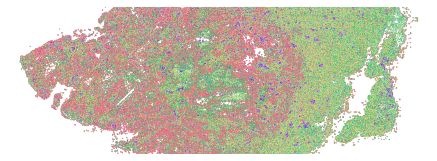

In [13]:

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    palette=cluster_colors_GBM,
    geometry_key='Centroid',
    cluster_key= 'Class',
    clusters = ['GW-like','AC-like','GBL-like','OPC-like', 'preOPC-like','RG-like', 'nIPC-like','Mural','Endothelial'],
    markersize=.25,
    figsize=(5,5),
    dpi=300,
    show_scalebar=False,
    
)

First filter, 68337 cells left
Selecting cells in zoom area
Zoom filter, 35974 cells left


/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


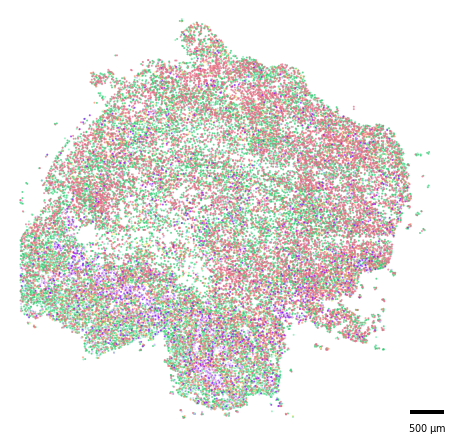

In [14]:

sp.pl.plot_polygons(
    adata,
    sample='SL006',
    palette=cluster_colors_GBM,
    geometry_key='Centroid',
    cluster_key= 'Class',
    clusters = ['AC-like', 'GBL-like','OPC-like', 'preOPC-like','RG-like', 'nIPC-like','GW-like','Mural','Endothelial'],
    xlim = (0, 7000),
    ylim= (0, 7000),
    markersize=7/4,
    dpi=300,
    figsize=(5,5),

    
)

First filter, 64920 cells left
Zoom filter, 64920 cells left


/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


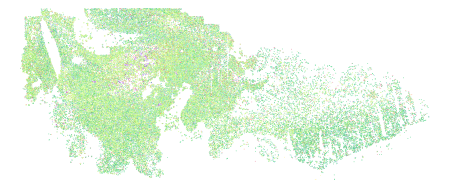

In [15]:

sp.pl.plot_polygons(
    adata,
    sample='SL001A',
    palette=cluster_colors_GBM,
    geometry_key='Centroid',
    cluster_key= 'Class',
    clusters = ['GW-like','AC-like','GBL-like','OPC-like', 'preOPC-like','RG-like', 'nIPC-like','Mural','Endothelial'],
    markersize=1/4,
    figsize=(5,5),
    dpi=300,
    show_scalebar=False,
    

    
)

First filter, 78250 cells left
Zoom filter, 78250 cells left


/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


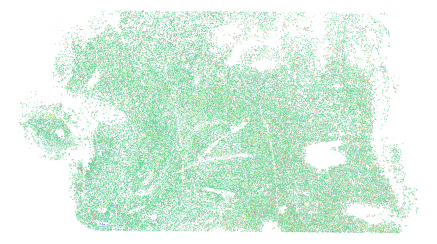

In [16]:

sp.pl.plot_polygons(
    adata,
    sample='SL001B',
    palette=cluster_colors_GBM,
    geometry_key='Centroid',
    cluster_key= 'Class',
    clusters = ['GW-like','AC-like','GBL-like','OPC-like', 'preOPC-like','RG-like', 'nIPC-like','Mural','Endothelial'],
    show_scalebar=False,
    dpi=300,
    figsize=(5,5),
    markersize=1/4,
    
)

# SL035B

First filter, 346153 cells left
Selecting cells in zoom area
Zoom filter, 13482 cells left


/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


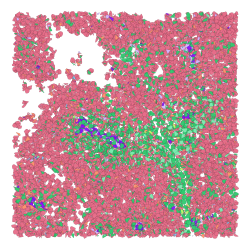

In [17]:
sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    palette=cluster_colors_GBM,
    cluster_key= 'Class',
    clusters = ['GW-like','OPC-like','Endothelial','Mural','RG-like','AC-like','GBL-like','preOPC-like',],
    
    xlim = (11000, 13000),
    ylim= (5000, 7000),
    figsize=(3,3),
    dpi=300,
    alpha=.95,
    show_scalebar=False,

    
)

First filter, 234581 cells left
Selecting cells in zoom area
Zoom filter, 9226 cells left


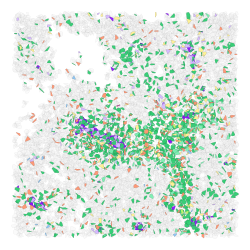

In [18]:
sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    palette=cluster_colors_GBM,
    cluster_key= 'Class',
    clusters = ['Mural','Endothelial','AC-like','GBL-like', 'preOPC-like','OPC-like', 'nIPC-like','RG-like'],
    grey_clusters = ['GW-like'],
    xlim = (11000, 13000),
    ylim= (5000, 7000),
    figsize=(3,3),
    dpi=300,
    area_min_size=150,
    alpha=.95,
    show_scalebar=False,

    
)

First filter, 203875 cells left
Selecting cells in zoom area
Zoom filter, 8603 cells left


/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


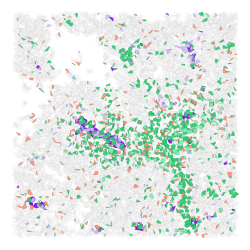

In [21]:
# AC-like 3,5 and 6 are the clearest Astrocyte-like m-states
sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    palette=cluster_colors_GBM_sub,
    cluster_key= 'm-states',
    clusters = ['Mural', 'Endothelial', 'AC-like 3', 'AC-like 6','AC-like 5', 'RG-like','OPC-like 2','preOPC-like 1', 'OPC-like 1'],
    grey_clusters = ['GW-like 1', 'GW-like 2','GW-like 3','GW-like 4','GW-like 5','GW-like 6','GW-like 7', 'GW-like 8'],
    xlim = (11000, 13000),
    ylim= (5000, 7000),
    figsize=(3,3),
    dpi=300,
    area_min_size=150,
    alpha=.95,
    show_scalebar=False,

    
)

In [22]:
import seaborn as sns
paletteGW = {
    'GW-like 2': '#EDE8F3',
    'GW-like 3': '#E2D8EA',
    'GW-like 1': '#D6BEDD',
    'GW-like 5': '#CFA8D1',
    'GW-like 4': '#CA90C5',
    'GW-like 7': '#D873B6',
    'GW-like 8': '#C50F53',
    'GW-like 6': '#840034'
}

First filter, 224674 cells left
Selecting cells in zoom area
Zoom filter, 9007 cells left


/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


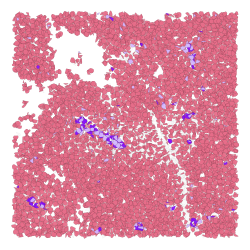

In [24]:
sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    palette=cluster_colors_GBM_sub,
    cluster_key= 'm-states',
    clusters = ['GW-like 2', 'GW-like 3','GW-like 1','GW-like 5','GW-like 4','GW-like 7','GW-like 8', 'GW-like 6', 'Mural', 'Endothelial'],
    grey_clusters = [
        'AC-like 1','AC-like 2','AC-like 3','AC-like 4','AC-like 5','AC-like 6','AC-like 7',
        'preOPC-like 1', 'RG-like',
                    ],
    xlim = (11000, 13000),
    ylim= (5000, 7000),
    figsize=(3,3),
    dpi=300,
    area_min_size=150,
    alpha=.95,
    show_scalebar=False,
    
)

First filter, 225794 cells left
Selecting cells in zoom area
Zoom filter, 9048 cells left


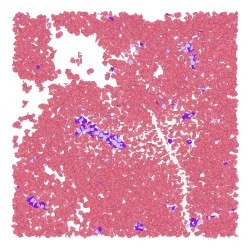

In [25]:
sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    palette=cluster_colors_GBM,
    cluster_key= 'Class',
    clusters = ['GW-like', 'Mural', 'Endothelial'],
    grey_clusters = [
        'AC-like',
        'preOPC-like', 'RG-like', 'OPC-like',
                    ],
    xlim = (11000, 13000),
    ylim= (5000, 7000),
    figsize=(3,3),
    dpi=300,
    area_min_size=150,
    alpha=.95,
    show_scalebar=False,
    

    
)

First filter, 241498 cells left
Selecting cells in zoom area
Zoom filter, 15869 cells left


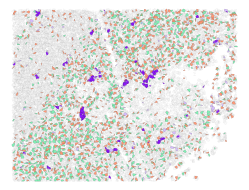

In [28]:
grey_c = adata.obs['m-states'].cat.categories
grey_c = grey_c[grey_c.isin(cluster_colors_GBM_sub)]
sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    palette=cluster_colors_GBM_sub,
    cluster_key= 'm-states',
    clusters =  ['Endothelial', 'Mural','preOPC-like 1','OPC-like 1', 'RG-like'],
    grey_clusters = grey_c.tolist(),
    xlim = (12000, 15000),
    ylim= (1000, 4000),
    figsize=(3,3),
    dpi=300,
    area_min_size=150,
    alpha=.95,
    show_scalebar=False,
    
    
)

# SL006

First filter, 40165 cells left
Selecting cells in zoom area
Zoom filter, 2075 cells left


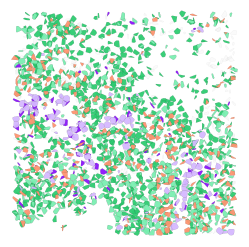

In [30]:
grey_c = adata.obs['m-states'].cat.categories
grey_c = grey_c[grey_c.isin(cluster_colors_GBM_sub)]
sp.pl.plot_polygons(
    adata,
    sample='SL006',
    palette=cluster_colors_GBM,
    cluster_key= 'Class',
    clusters =   ['AC-like','GBL-like', 'preOPC-like','Mural','Endothelial','RG-like'],
    grey_clusters = ['GW-like','nIPC-like','OPC-like','Mural','GBL-like','preOPC-like'],
    xlim = (1500, 3000),
    ylim = (1800, 3300),

    figsize=(3,3),
    dpi=300,
    area_min_size=150,
    alpha=.95,
    show_scalebar=False,
    
    
)

First filter, 34535 cells left
Selecting cells in zoom area
Zoom filter, 1875 cells left


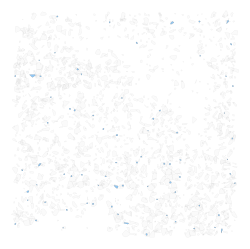

In [32]:
grey_c = adata.obs['m-states'].cat.categories
grey_c = grey_c[grey_c.isin(cluster_colors_GBM_sub)]
sp.pl.plot_polygons(
    adata,
    sample='SL006',
    palette=cluster_colors_GBM,
    cluster_key= 'Class',
    clusters =   ['OPC-like'],
    grey_clusters = ['GW-like','nIPC-like','OPC-like','Mural','GBL-like','preOPC-like'],
    xlim = (1500, 3000),
    ylim = (1800, 3300),

    figsize=(3,3),
    dpi=300,
    area_min_size=10,
    alpha=.95,
    show_scalebar=False,
    
    
)

First filter, 39854 cells left
Selecting cells in zoom area
Zoom filter, 3930 cells left


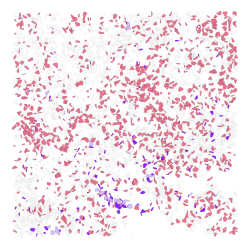

In [33]:
grey_c = adata.obs['m-states'].cat.categories
grey_c = grey_c[grey_c.isin(cluster_colors_GBM_sub)]
sp.pl.plot_polygons(
    adata,
    sample='SL006',
    palette=cluster_colors_GBM,
    cluster_key= 'Class',
    clusters = ['GW-like' , 'Mural', 'Endothelial'],
    grey_clusters = [
        'AC-like',
        'preOPC-like','OPC-like','RG-like',
                    ],
    xlim = (3000, 5000),
    ylim= (2000, 4000),

    figsize=(3,3),
    dpi=300,
    area_min_size=150,
    alpha=.95,
    show_scalebar=False,
    
)